# Spotify - Top Hits Spotify from 2000-2019

[Dataset link](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019)

This is a collection of data taken from the popular music streaming platform Spotify. 

Let's explore data and find out all the information that we can using pandas and matplotlib.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


## Context

This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities.


- artist: Name of the Artist.
  
- song: Name of the Track.
- duration_ms: Duration of the track in milliseconds.
- explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- year: Release Year of the track.
- popularity: The higher the value the more popular the song is.
-danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat 
- strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- genre: Genre of the track.


In [102]:
# df = pd.read_csv("../Risorse/dataset/top_hits_spotify_2000-2019.csv")
df = pd.read_csv("https://raw.githubusercontent.com/pg-88/ARTIFICIAL-INTELLIGENCE-MACHINE-LEARNING/refs/heads/main/Risorse/dataset/top_hits_spotify_2000-2019.csv")
df.info()
df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,2000.0,228748.124500,39136.569008,113000.000000,203580.00000,223279.50000,248133.000000,484146.000
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667438,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512434,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976


## Checking data missing / null value

Before we start doing anything let's check the data. I want to know if there are any missing value any duplicate row, and if the type of every row is compatible with the data that should be represented.

### Null value

In [104]:
df.isnull().sum()
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

### duplicated value

`dataframe.duplicated()` This method allow to discorver duplicate row, 

In [105]:

df.duplicated().value_counts()
df.duplicated().sum()
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

There are duplicated, let see the lines

In [106]:

df[df.duplicated(subset="artist")]
df[df.duplicated(subset="artist", keep='last')]


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,Ed Sheeran,Take Me Back to London (feat. Stormzy),189733,True,2019,66,0.885,0.762,8,-5.513,0,0.2160,0.2190,0.000000,0.1620,0.605,138.058,pop
1972,Jonas Brothers,Only Human,183000,False,2019,71,0.795,0.496,0,-5.883,1,0.0722,0.1080,0.000000,0.0645,0.874,94.010,pop
1984,Post Malone,Better Now,231266,True,2018,80,0.680,0.578,10,-5.804,1,0.0400,0.3310,0.000000,0.1350,0.341,145.038,hip hop
1990,Sam Smith,How Do You Sleep?,202204,False,2019,73,0.477,0.682,1,-4.931,0,0.0925,0.1530,0.000000,0.0763,0.345,110.567,pop


Once we're sure that values are really discardable, we can use the method `dataFrame.drop_duplicates()`


In [107]:
# using drop selecting the rows 
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

# Using drop_duplicates 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1941 non-null   object 
 1   song              1941 non-null   object 
 2   duration_ms       1941 non-null   int64  
 3   explicit          1941 non-null   bool   
 4   year              1941 non-null   int64  
 5   popularity        1941 non-null   int64  
 6   danceability      1941 non-null   float64
 7   energy            1941 non-null   float64
 8   key               1941 non-null   int64  
 9   loudness          1941 non-null   float64
 10  mode              1941 non-null   int64  
 11  speechiness       1941 non-null   float64
 12  acousticness      1941 non-null   float64
 13  instrumentalness  1941 non-null   float64
 14  liveness          1941 non-null   float64
 15  valence           1941 non-null   float64
 16  tempo             1941 non-null   float64


**Notice** the index in the dataframe, how has changed after the drop?

### Looking into the data 

First thing to do now that our dataset is clean, is to understand how the dataframe is structured

In [109]:
# shape
# numbers of rows and columns
df.shape


(1941, 18)

In [110]:
# describe
# statistical data
# df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,1941.0,228594.973725,39249.796103,113000.000000,203506.0000,223186.0000,247946.000000,484146.000
year,1941.0,2009.520350,5.875532,1998.000000,2004.0000,2010.0000,2015.000000,2020.000
popularity,1941.0,59.633179,21.501053,0.000000,56.0000,65.0000,73.000000,89.000
danceability,1941.0,0.667814,0.140608,0.129000,0.5810,0.6760,0.765000,0.975
energy,1941.0,0.721549,0.152872,0.054900,0.6240,0.7390,0.840000,0.999
key,1941.0,5.369397,3.615270,0.000000,2.0000,6.0000,8.000000,11.000
loudness,1941.0,-5.514082,1.938950,-20.514000,-6.4900,-5.2850,-4.168000,-0.276
mode,1941.0,0.553323,0.497277,0.000000,0.0000,1.0000,1.000000,1.000
speechiness,1941.0,0.103783,0.096148,0.023200,0.0397,0.0610,0.129000,0.576
acousticness,1941.0,0.128173,0.172584,0.000019,0.0135,0.0558,0.176000,0.976


### How about genere?

If we want to see data related to musical genere, it's important to make digestible the data to pandas, as a string ("pop", "rock", etc...) it doesn't mean anything.
On the other hand we may want to add a clear label for the column key and mode as to make more human readable the data.

Using `get_dummies` for the genere: 

In [111]:
df['genre'].nunique()
# pd.get_dummies(df['genre'])

59

Using `dataFrame.transform()` allow us to apply a function to all the element of a Series to change the values of the data

In [112]:
    
def scalar_to_key(int_key):
    if int_key == 0:
        return "C"
    elif int_key == 1:
        return "C#"
    elif int_key == 2:
        return "D"  
    elif int_key == 3:
        return "D#"
    elif int_key == 4:
        return "E"
    elif int_key == 5:
        return "F"
    elif int_key == 6:
        return "F#"
    elif int_key == 7:
        return "G"
    elif int_key == 8:
        return "G#"
    elif int_key == 9:
        return "A"
    elif int_key == 10:
        return "A#"
    elif int_key == 11:
        return "B"
    


df["key_str"] = df["key"].transform(scalar_to_key)
df


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,key_str
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,C#
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",C
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",G
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",C
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,G#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,C#
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,A
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",A
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,G#


In [113]:
def scalar_to_mode(int_mode):
    if int_mode == 1:
        return "Major"
    elif int_mode == 0:
        return "Minor"


df["mode_str"] = df["mode"].transform(scalar_to_mode)

In [114]:
df


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,key_str,mode_str
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,C#,Minor
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",C,Major
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",G,Major
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",C,Minor
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,G#,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,C#,Minor
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,A,Major
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",A,Major
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,G#,Major


In [115]:
# Could be useful also for searching a dataframe
df.loc[df["artist"] == "jonas brothers"] # does not find the artist 
# df[df["artist"].transform(lambda x: x.upper()) == "JONAS BROTHERS"] # this will find it!

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,key_str,mode_str


## Data visualization

Plotting graphs directly with pandas

In [116]:

genre = df["genre"].value_counts()
genre

pop                                      416
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
country   

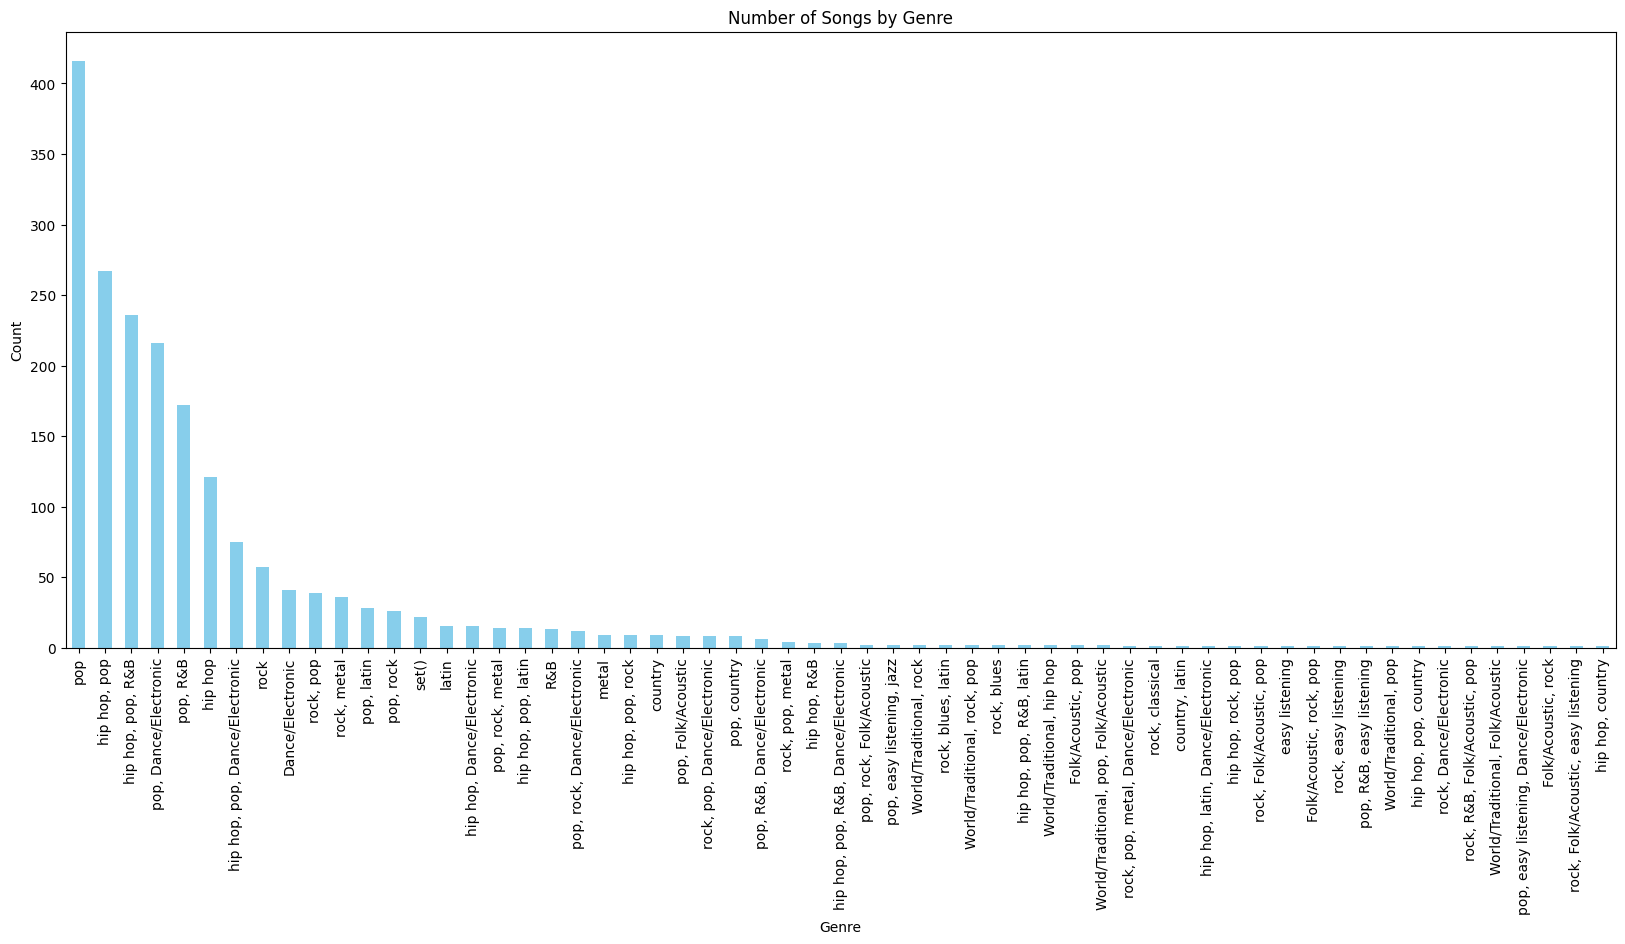

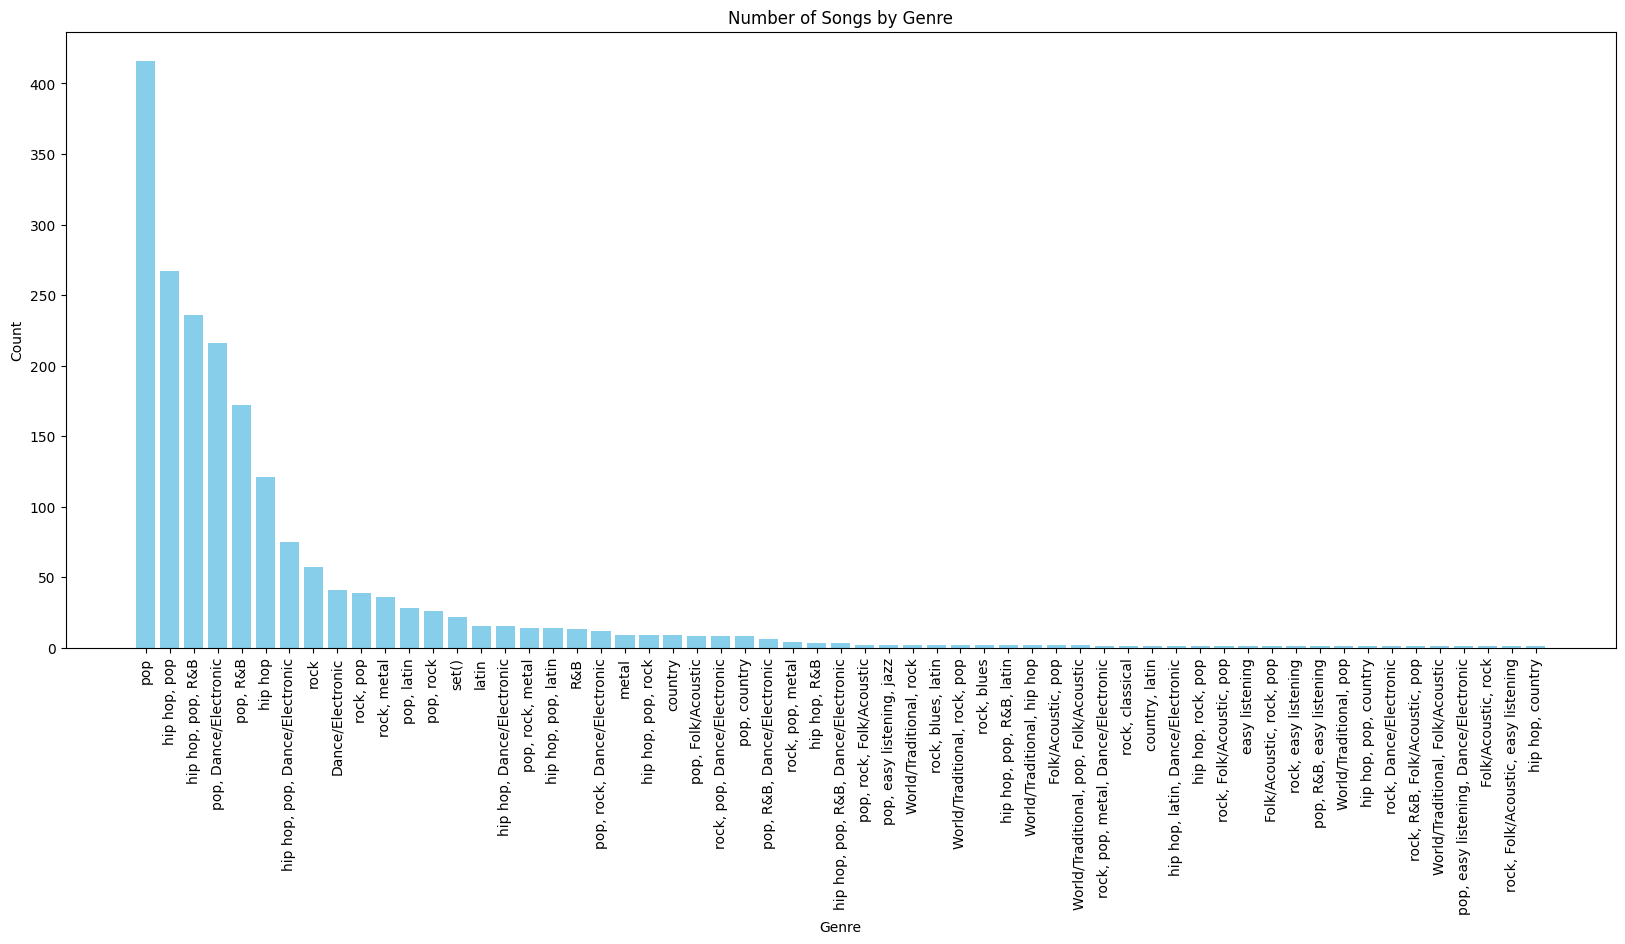

In [23]:

genre = df["genre"].value_counts()
plt.figure(figsize=(20,8))
genre.plot(kind='bar', figsize=(20,8), color="skyblue")
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate x labels for better readability

plt.figure(figsize=(20,8))

plt.bar(genre.index, genre.values, color="skyblue")
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);  # Rotate x labels for better readability

### Other histogram graphs
Try to plot similar graph for Loudness, Tempo, Energy and popularity

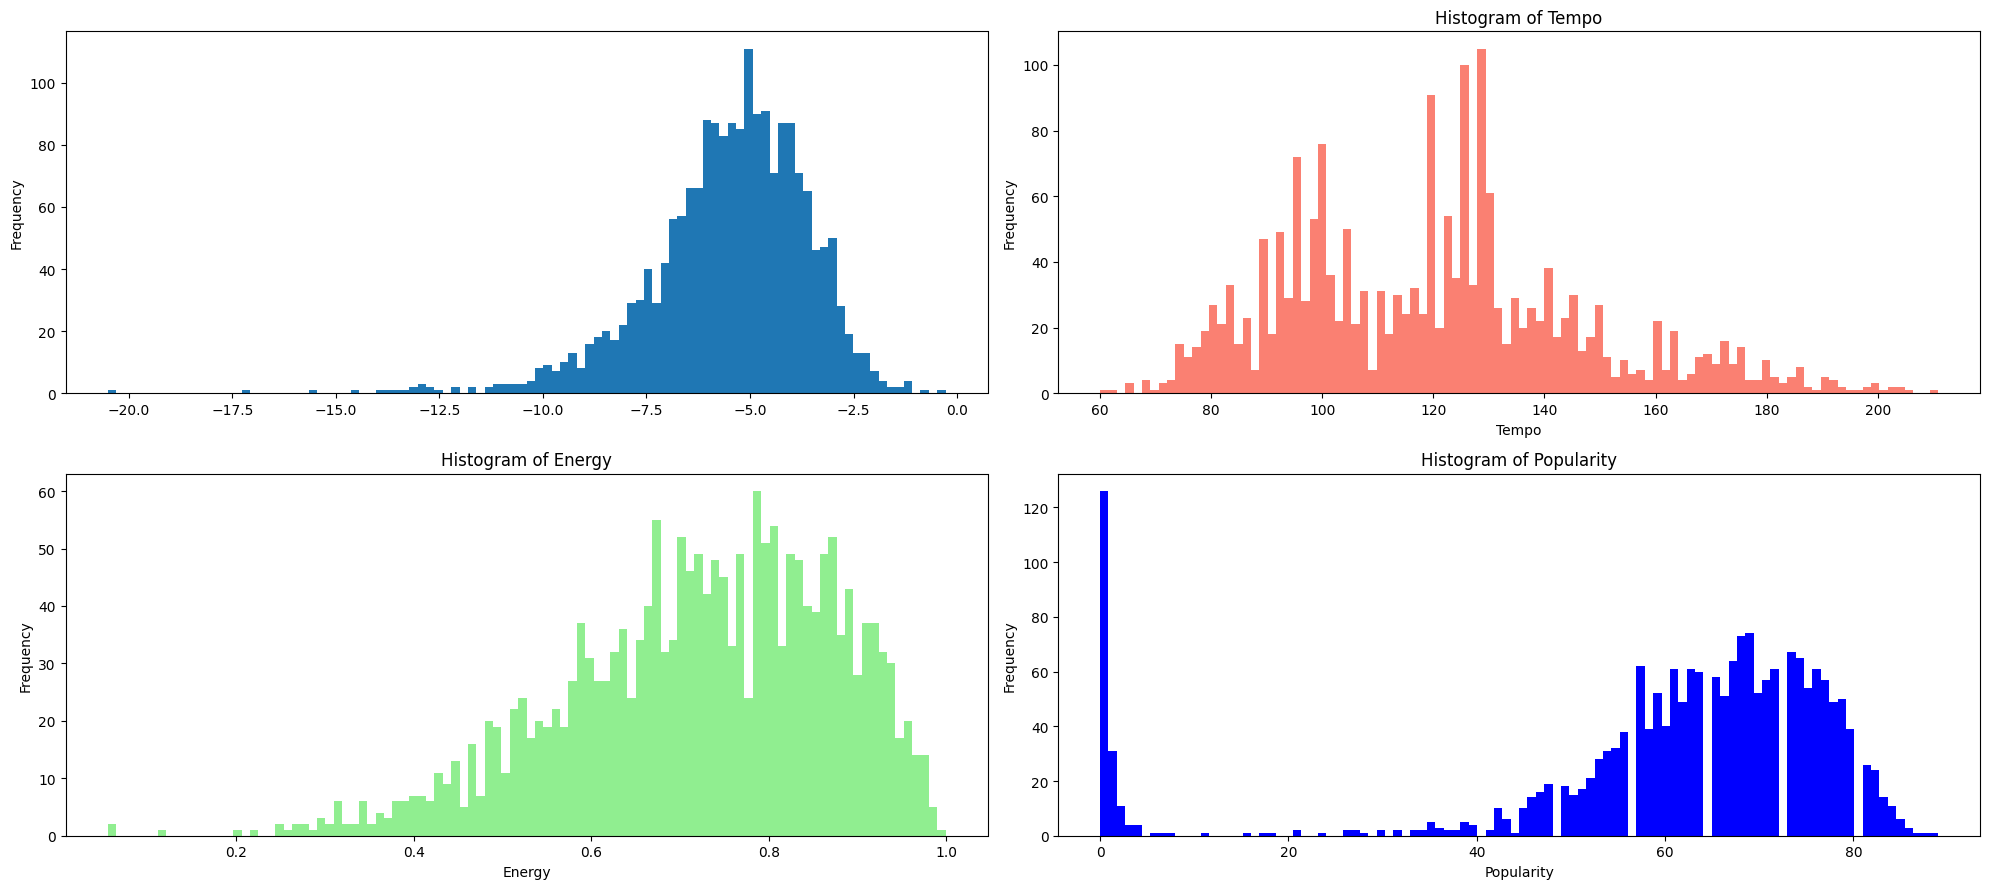

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(20, 9))
df['loudness'].plot(kind='hist', bins=100, ax=axes[0, 0])


# Plot a histogram of 'tempo' in the second subplot
df['tempo'].plot(kind='hist', bins=100, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Tempo')
axes[0, 1].set_xlabel('Tempo')
axes[0, 1].set_ylabel('Frequency')

# Plot a histogram of 'energy' in the third subplot
df['energy'].plot(kind='hist', bins=100, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Energy')
axes[1, 0].set_xlabel('Energy')
axes[1, 0].set_ylabel('Frequency')

# Plot a histogram of 'popularity' in the third subplot
df["popularity"].plot(kind='hist', bins=100, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Popularity')
axes[1, 1].set_xlabel('Popularity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

For a wider choice of colors: [matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

### Data aggregation



Who is the most prolific artist in this dataset? Try to draw a plot to visualize the number of songs per artist in the data that we have.

- Step 1: group by artist
- Step 2: find the number of songs per artist
- Step 3: plot usinig bar

In [26]:
songs_per_artist = df.groupby("artist").size()
# songs_per_artist.plot(kind='bar', color="red")
songs_per_artist

artist
*NSYNC         4
112            2
2 Chainz       2
21 Savage      2
2Pac           2
              ..
girl in red    1
iann dior      2
iio            1
t.A.T.u.       1
will.i.am      4
Length: 835, dtype: int64

Is the output readable? Maybe try to select onli the top artist
- Sort 
- Slice 
- plot again
  

<Axes: title={'center': 'Artist with more than 5 songs and less than 10'}, xlabel='artist'>

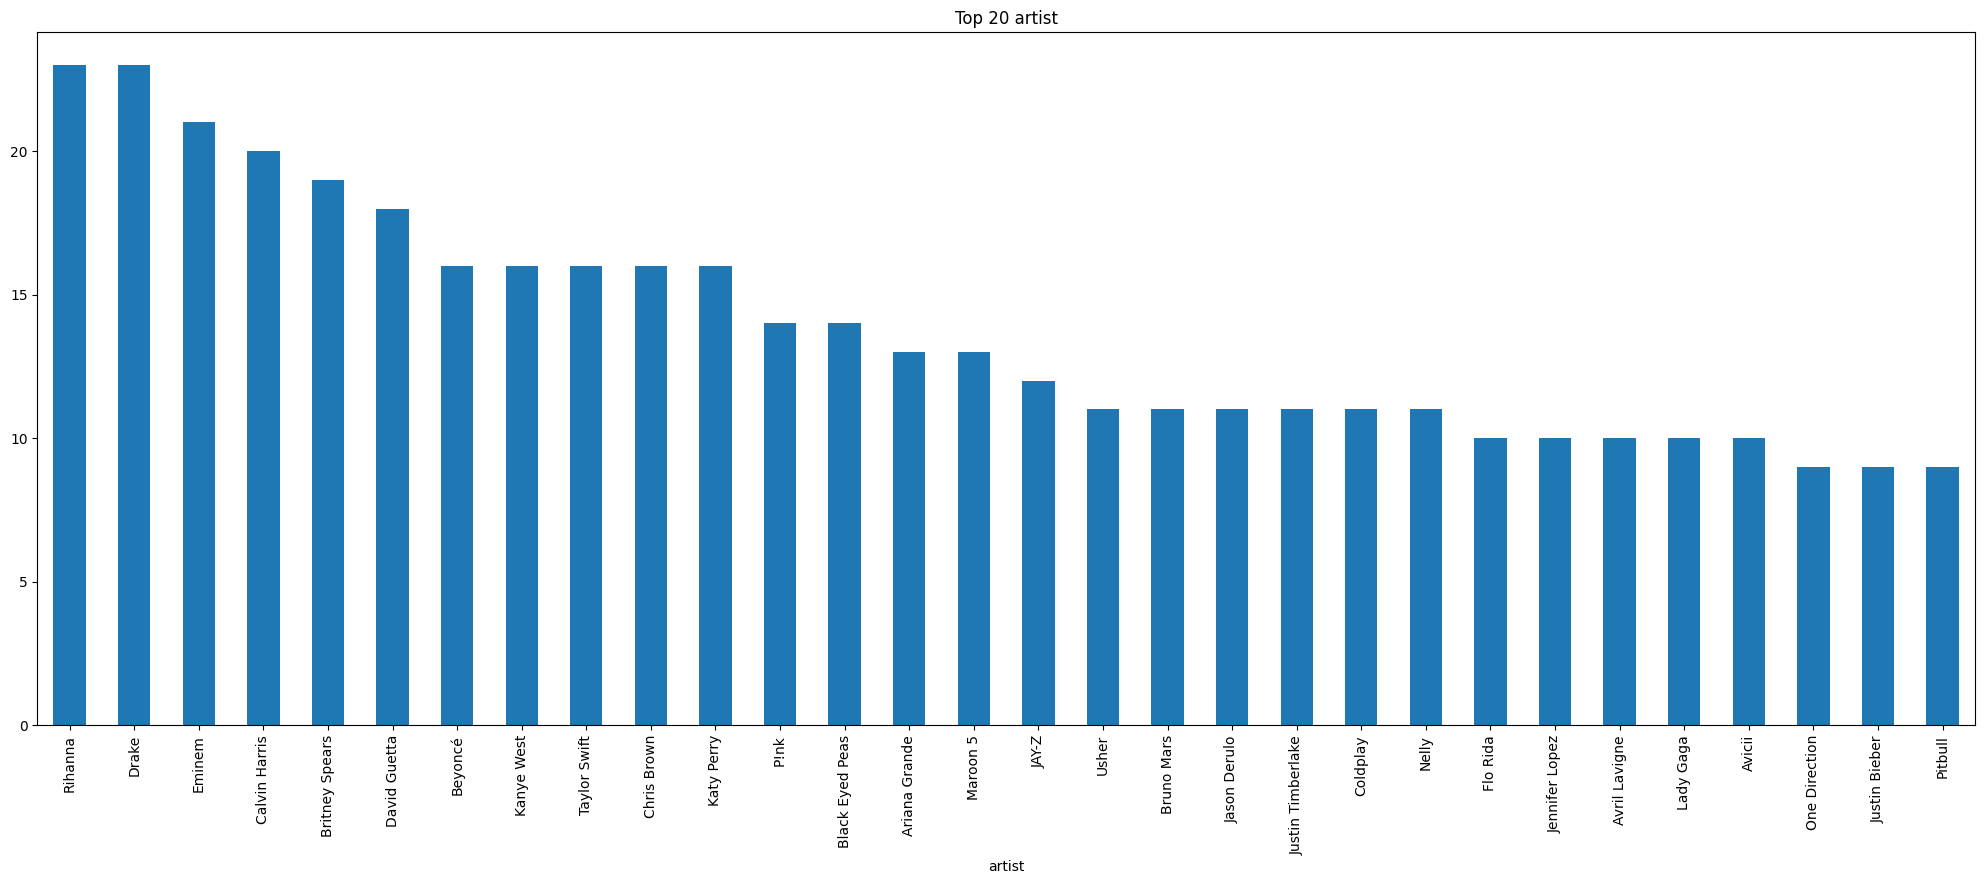

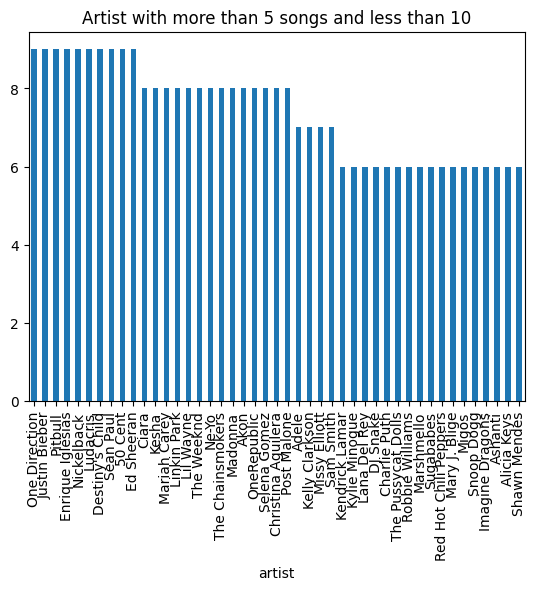

In [27]:
songs_per_artist.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(25, 9))
songs_per_artist[:30].plot(kind='bar', title="Top 20 artist")
plt.figure()
songs_per_artist[(songs_per_artist < 10) & (songs_per_artist > 5 )].plot(kind='bar', title="Artist with more than 5 songs and less than 10")

What if we need to rapresent the total of the indicator of popularity for each artist?

In [28]:
# groupby artist and select the column popularity, then calculate the sum
overall_popularity = df.groupby("artist")["popularity"].sum()
overall_popularity

artist
*NSYNC         220
112            120
2 Chainz       140
21 Savage      152
2Pac           125
              ... 
girl in red     82
iann dior      141
iio             54
t.A.T.u.        39
will.i.am      254
Name: popularity, Length: 835, dtype: int64

In [29]:
overall_popularity = overall_popularity.sort_values(ascending=False)
overall_popularity

artist
Rihanna                 1662
Eminem                  1519
Drake                   1424
Calvin Harris           1356
Britney Spears          1198
                        ... 
Silentó                    0
Childish Gambino           0
Two Door Cinema Club       0
Jim Jones                  0
Kungs                      0
Name: popularity, Length: 835, dtype: int64

<Axes: xlabel='artist'>

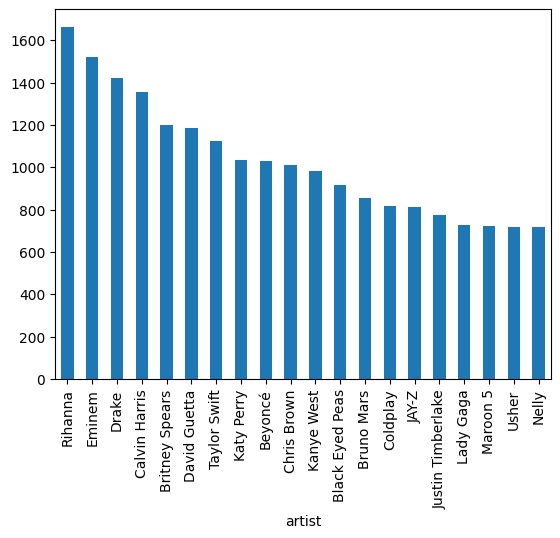

In [30]:
# plot the bar graph for popularity of artist
overall_popularity[:20].plot(kind='bar')

### Percentage of explicit content

Now try to rapresent the number of explicit content vs the non explicit content. 

Is there a better option than the graph seen so far?

<Axes: >

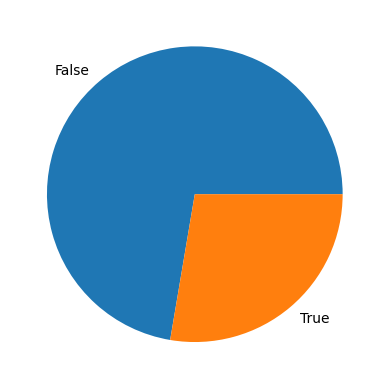

In [31]:
df.groupby("explicit").size().plot(kind='pie')

### Plottin 2 different measure

When we want to find relation between 2 diffrent measure we can use scatter plot.

Try to plot different measure toghether in order to see if they are related in any way.

<Axes: xlabel='popularity', ylabel='acousticness'>

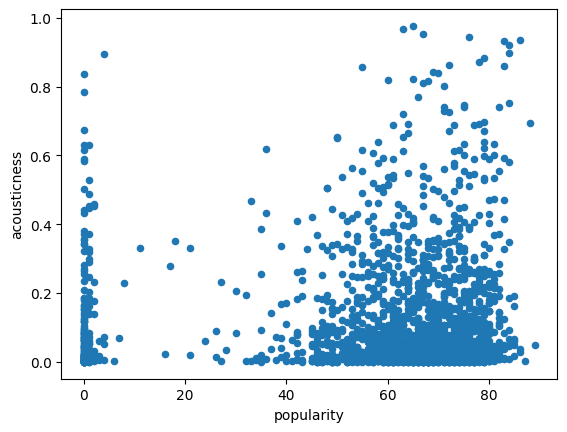

In [32]:
# popularity vs acousticness
df.plot(kind='scatter', x="popularity", y="acousticness")

<Axes: xlabel='energy', ylabel='loudness'>

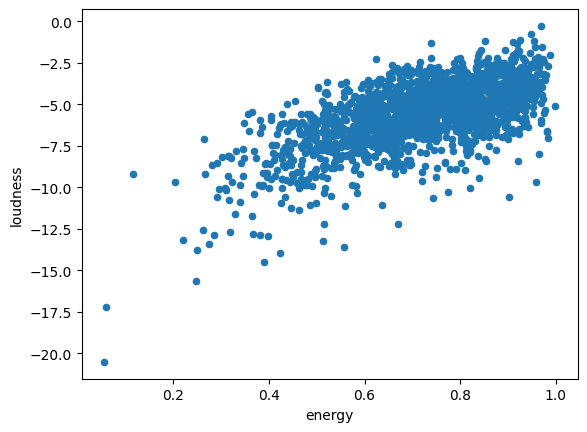

In [33]:
# energy vs loudness
df.plot(kind='scatter', x="energy", y="loudness")

<Axes: xlabel='energy', ylabel='danceability'>

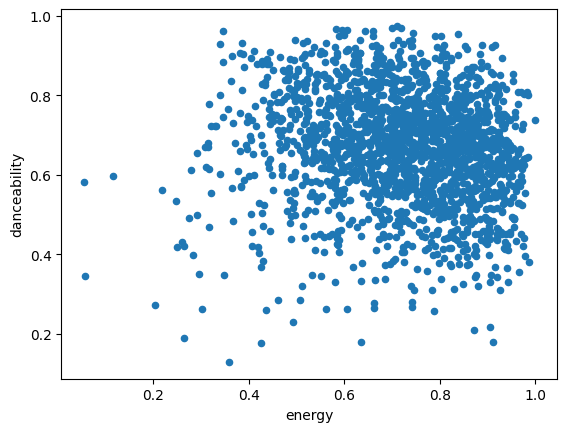

In [34]:
# energy vs danceability
df.plot(kind='scatter', x='energy', y='danceability')

<Axes: title={'center': 'danceability vs speechiness'}, xlabel='danceability', ylabel='speechiness'>

<Figure size 1500x800 with 0 Axes>

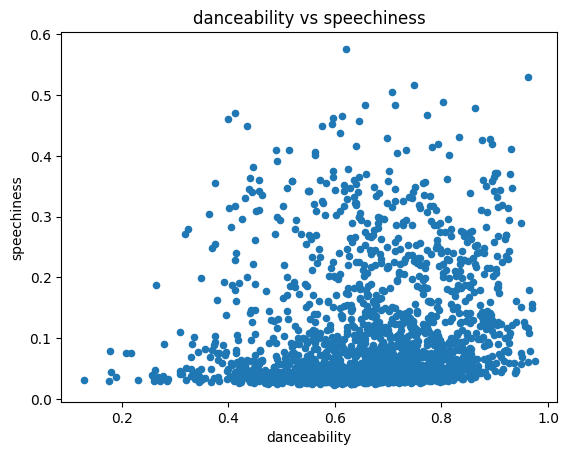

In [35]:
# danceability vs speechiness
plt.figure(figsize=(15, 8 ))
df.plot(kind='scatter', x='danceability', y='speechiness', title="danceability vs speechiness")


### Correlation

To better understand the relations between all the different variables measured, a good idea is to plot out a correlation matrix plot.

This allow us to understand which variables are directly correlated (a increase => b increase) inversly correlated (a increase => b decrease) or not correlated at all.

documentation [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 

In [36]:
import seaborn as sns 

correlation = df.corr()
df.corr()

/tmp/ipykernel_9179/179331417.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()
/tmp/ipykernel_9179/179331417.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.119608,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762
explicit,0.119608,1.000000,0.077361,0.047308,0.243799,-0.164212,0.001795,-0.091265,0.050653,0.415445,-0.028032,-0.082605,0.008238,-0.045397,0.014650
year,-0.318835,0.077361,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798
popularity,0.048140,0.047308,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057
danceability,-0.060083,0.243799,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074
energy,-0.082982,-0.164212,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305
key,-0.001353,0.001795,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852
loudness,-0.086226,-0.091265,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655
mode,-0.004095,0.050653,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445
speechiness,0.062538,0.415445,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192


<Axes: >

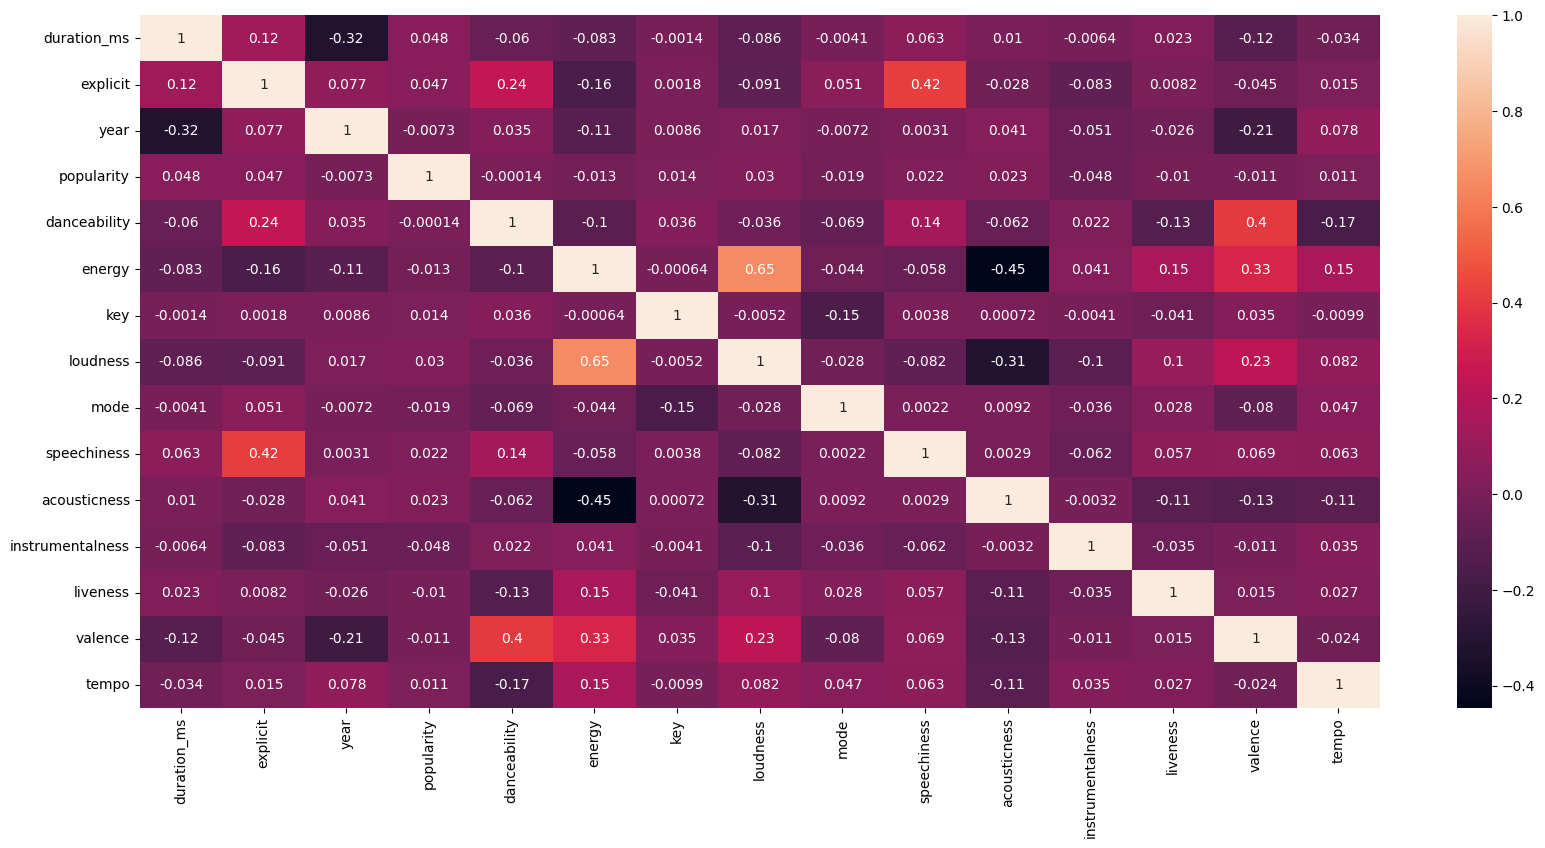

In [37]:
plt.figure(figsize=(20,9))

sns.heatmap(correlation, annot=True)


## PairPlot

It's another useful tool to visualize relation between data, it will print every possible combination of dataseries in the dataset.

The problem is that it's quite big graph and difficult to read, also it takes a lot of resources to make this plot.

In [38]:
# sns.pairplot(df)

## CLUSTER
We use mesure of distance

In [39]:
df["loudness"]

0      -5.444
1      -4.918
2      -9.007
3      -4.063
4      -4.806
        ...  
1995   -5.065
1996   -5.707
1997   -8.635
1998   -7.513
1999   -3.497
Name: loudness, Length: 1941, dtype: float64

In [40]:
df['duration_ms']

0       211160
1       167066
2       250546
3       224493
4       200560
         ...  
1995    181026
1996    178426
1997    200593
1998    171029
1999    215280
Name: duration_ms, Length: 1941, dtype: int64

**Scale the dataframe**

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [117]:
df.head(2)
# df["genre"]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,key_str,mode_str
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop,C#,Minor
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop",C,Major


In [118]:
X = df.drop(columns=["artist", "song", "key_str", "mode_str"])

In [119]:
X

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [46]:
pd.get_dummies(data=df['genre'])

,Dance/Electronic,"Folk/Acoustic, pop","Folk/Acoustic, rock","Folk/Acoustic, rock, pop",R&B,"World/Traditional, Folk/Acoustic","World/Traditional, hip hop","World/Traditional, pop","World/Traditional, pop, Folk/Acoustic","World/Traditional, rock",...,"rock, blues","rock, blues, latin","rock, classical","rock, easy listening","rock, metal","rock, pop","rock, pop, Dance/Electronic","rock, pop, metal","rock, pop, metal, Dance/Electronic",set()
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X = pd.get_dummies(X)
X

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
0,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,...,0,0,0,0,0,0,0,0,0,0
1,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,...,0,0,0,0,0,1,0,0,0,0
2,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,...,0,0,0,0,0,0,0,0,0,0
3,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,...,0,0,0,0,1,0,0,0,0,0
4,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,...,0,0,0,0,0,0,0,0,0,0
1996,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,...,0,0,0,0,0,0,0,0,0,0
1997,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,...,0,0,0,0,0,0,0,0,0,0
1998,171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,...,0,0,0,0,0,0,0,0,0,0


Scale IT!!

In [121]:
scaled_X = scaler.fit_transform(X)

In [122]:
scaled_X

array([[-0.44431993, -0.61844857, -1.62075592, ..., -0.04544281,
        -0.02270383, -0.10707149],
       [-1.56802928, -0.61844857, -1.79099713, ..., -0.04544281,
        -0.02270383, -0.10707149],
       [ 0.55940884, -0.61844857, -1.79099713, ..., -0.04544281,
        -0.02270383, -0.10707149],
       ...,
       [-0.71361364, -0.61844857,  1.61382699, ..., -0.04544281,
        -0.02270383, -0.10707149],
       [-1.46703459, -0.61844857,  1.61382699, ..., -0.04544281,
        -0.02270383, -0.10707149],
       [-0.33932418, -0.61844857,  1.61382699, ..., -0.04544281,
        -0.02270383, -0.10707149]])

## Create the model 

In [123]:
from sklearn.cluster import KMeans

In [124]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [125]:
model = KMeans(n_clusters=4, random_state=42)

In [127]:
model

KMeans(n_clusters=4, random_state=42)

Apply the model to our data

In [128]:
cluster_labels = model.fit_predict(scaled_X)

/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [129]:
cluster_labels


array([0, 0, 2, ..., 1, 2, 3], dtype=int32)

In [130]:
X.head()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
0,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,...,0,0,0,0,0,0,0,0,0,0
1,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,...,0,0,0,0,0,1,0,0,0,0
2,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,...,0,0,0,0,0,0,0,0,0,0
3,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,...,0,0,0,0,1,0,0,0,0,0
4,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,...,0,0,0,0,0,0,0,0,0,0


Re-apply the labels to the data frame

In [132]:
X["cluster"] = cluster_labels
X

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,"genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set(),cluster
0,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,...,0,0,0,0,0,0,0,0,0,0
1,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,...,0,0,0,0,1,0,0,0,0,0
2,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,...,0,0,0,0,0,0,0,0,0,2
3,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,...,0,0,0,1,0,0,0,0,0,0
4,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,...,0,0,0,0,0,0,0,0,0,0
1996,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,...,0,0,0,0,0,0,0,0,0,0
1997,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,...,0,0,0,0,0,0,0,0,0,1
1998,171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,...,0,0,0,0,0,0,0,0,0,2


In [135]:
df["cluste"] = cluster_labels
df.drop(columns=["cluste"], inplace=True)

In [136]:
df['cluster'] = cluster_labels
df['cluster'].value_counts()

0    948
1    540
2    332
3    121
Name: cluster, dtype: int64

<Axes: ylabel='cluster'>

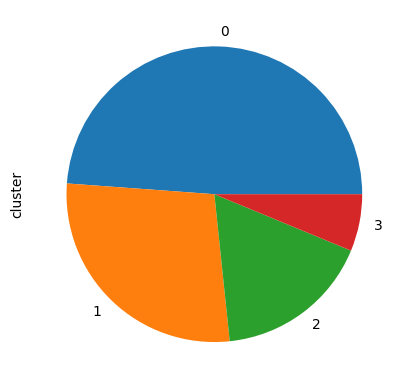

In [137]:
df['cluster'].value_counts().plot(kind='pie')

In [138]:
df.head(2)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,key_str,mode_str,cluster
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop,C#,Minor,0
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop",C,Major,0


<Axes: xlabel='popularity', ylabel='acousticness'>

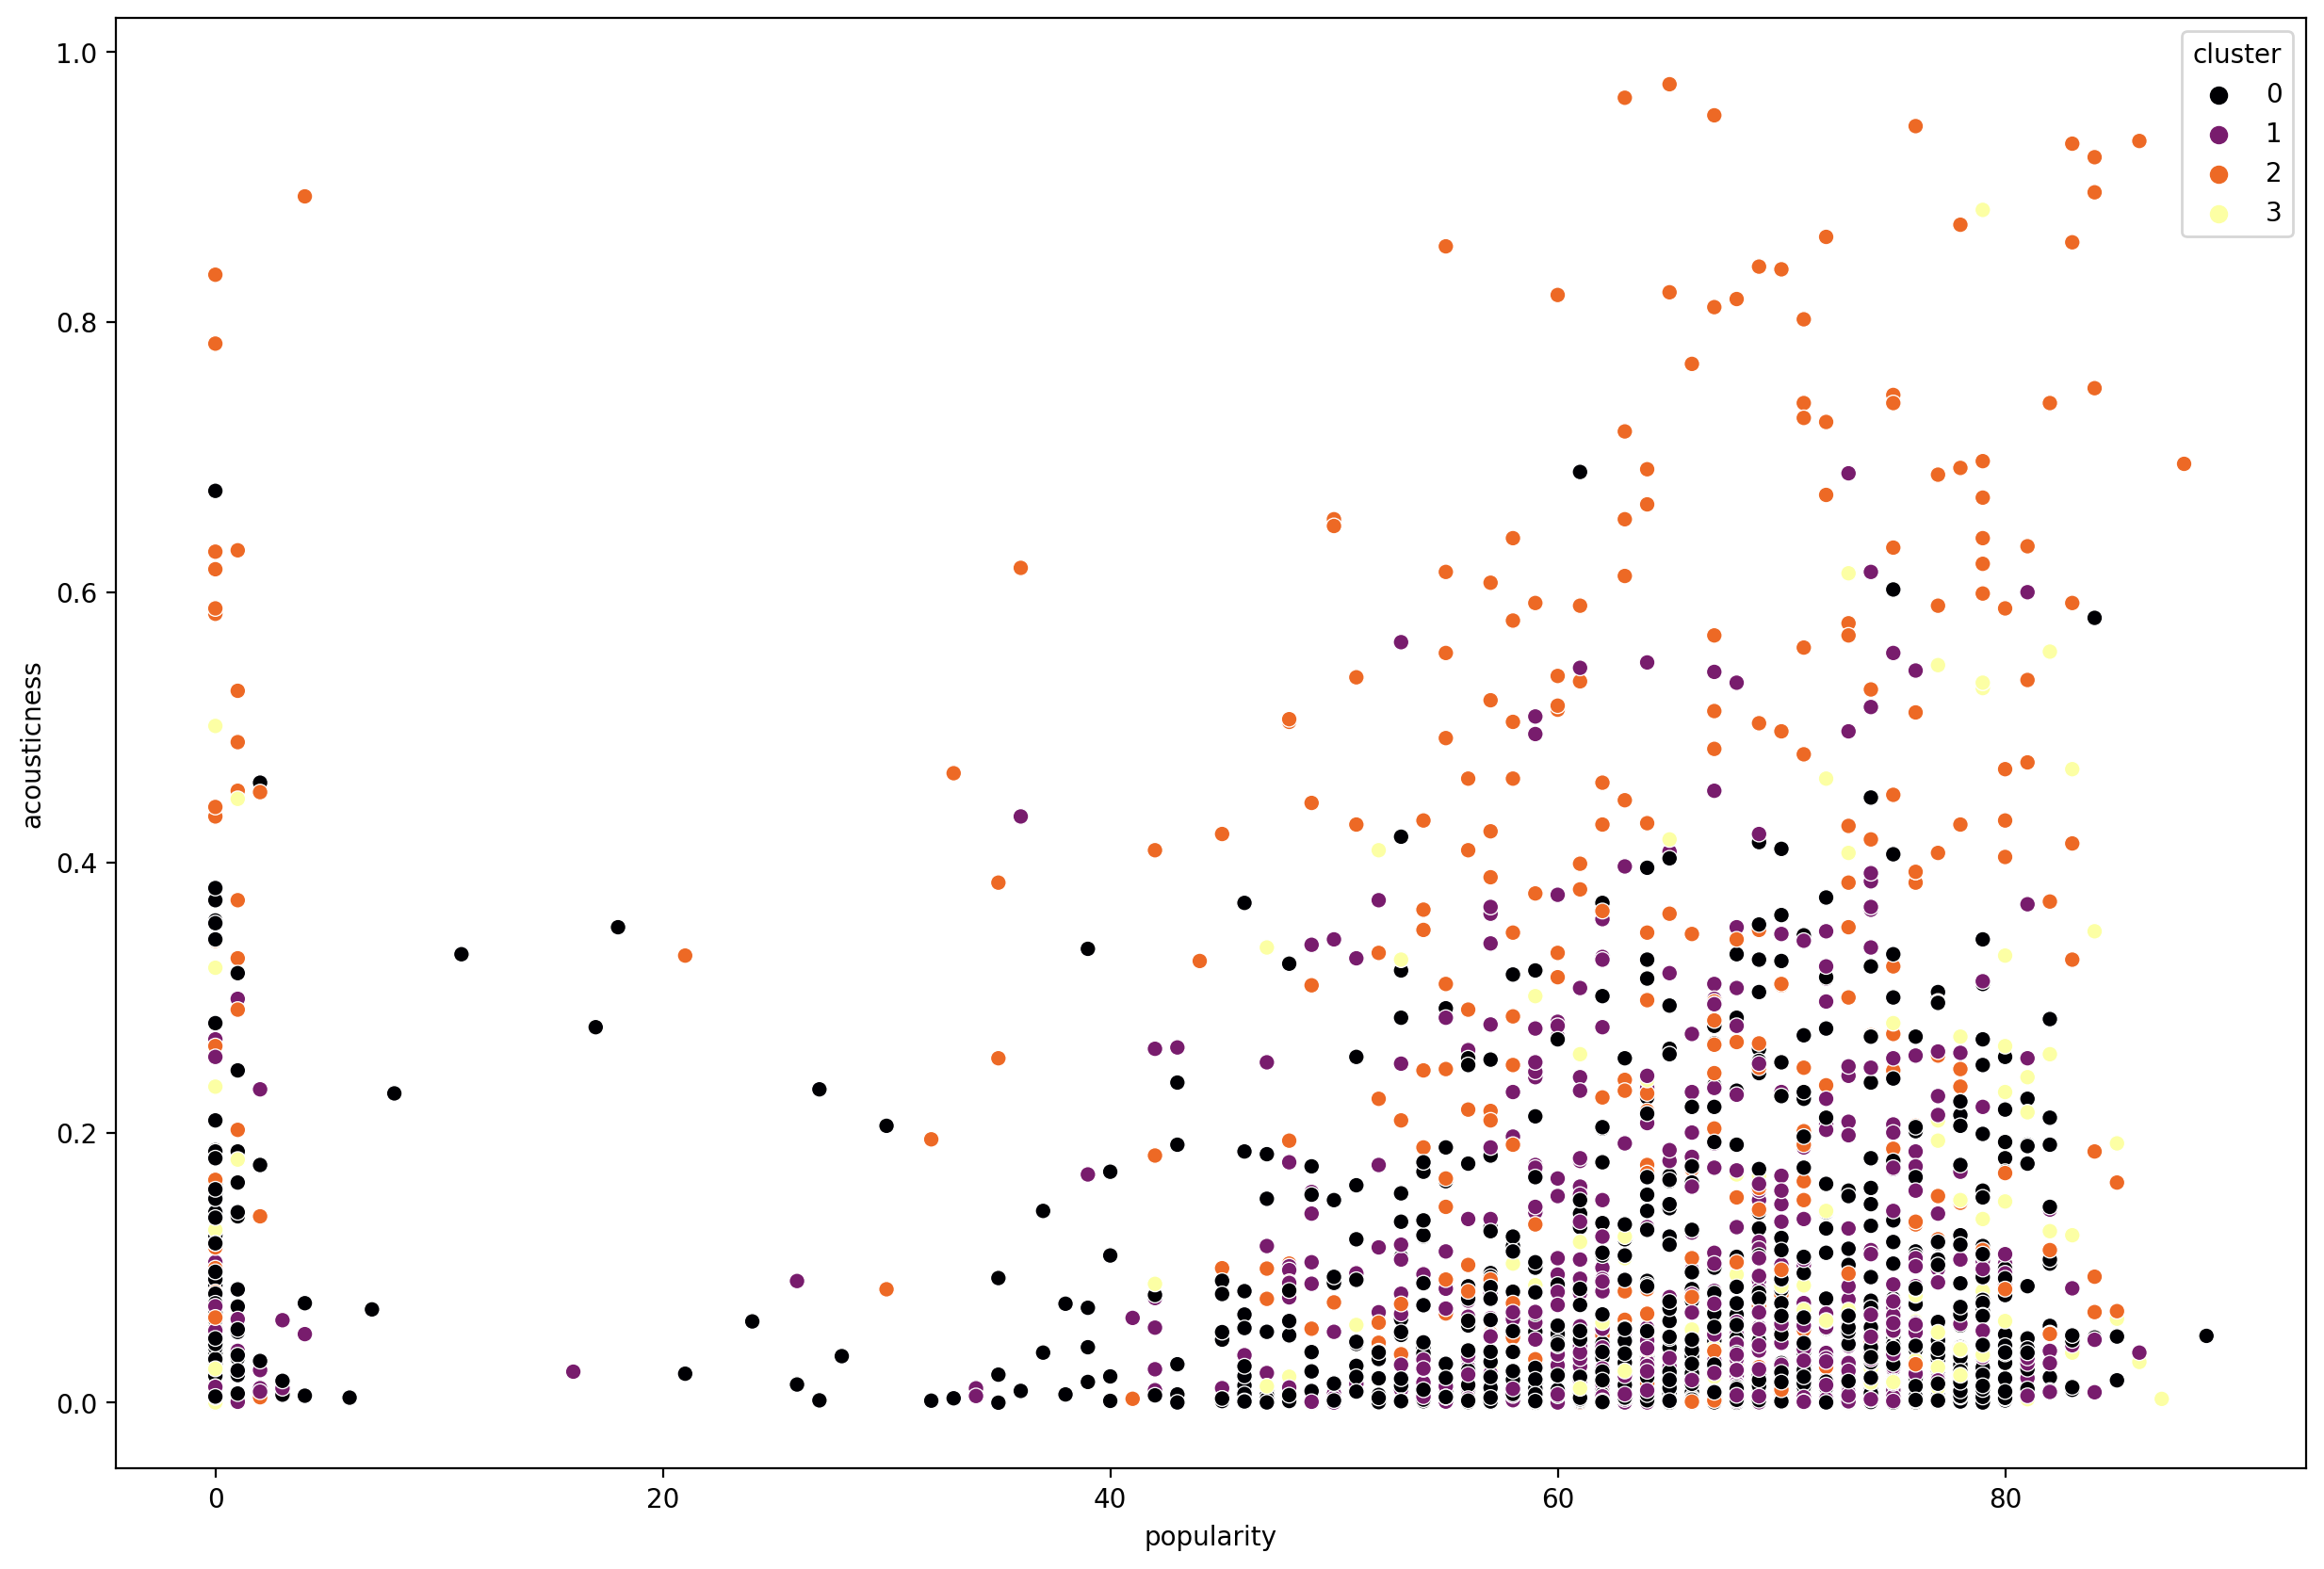

In [139]:
plt.figure(figsize=(15, 10), dpi=200)
sns.scatterplot(df, x='popularity', y="acousticness", hue="cluster", palette='inferno')

[matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<Axes: xlabel='popularity', ylabel='energy'>

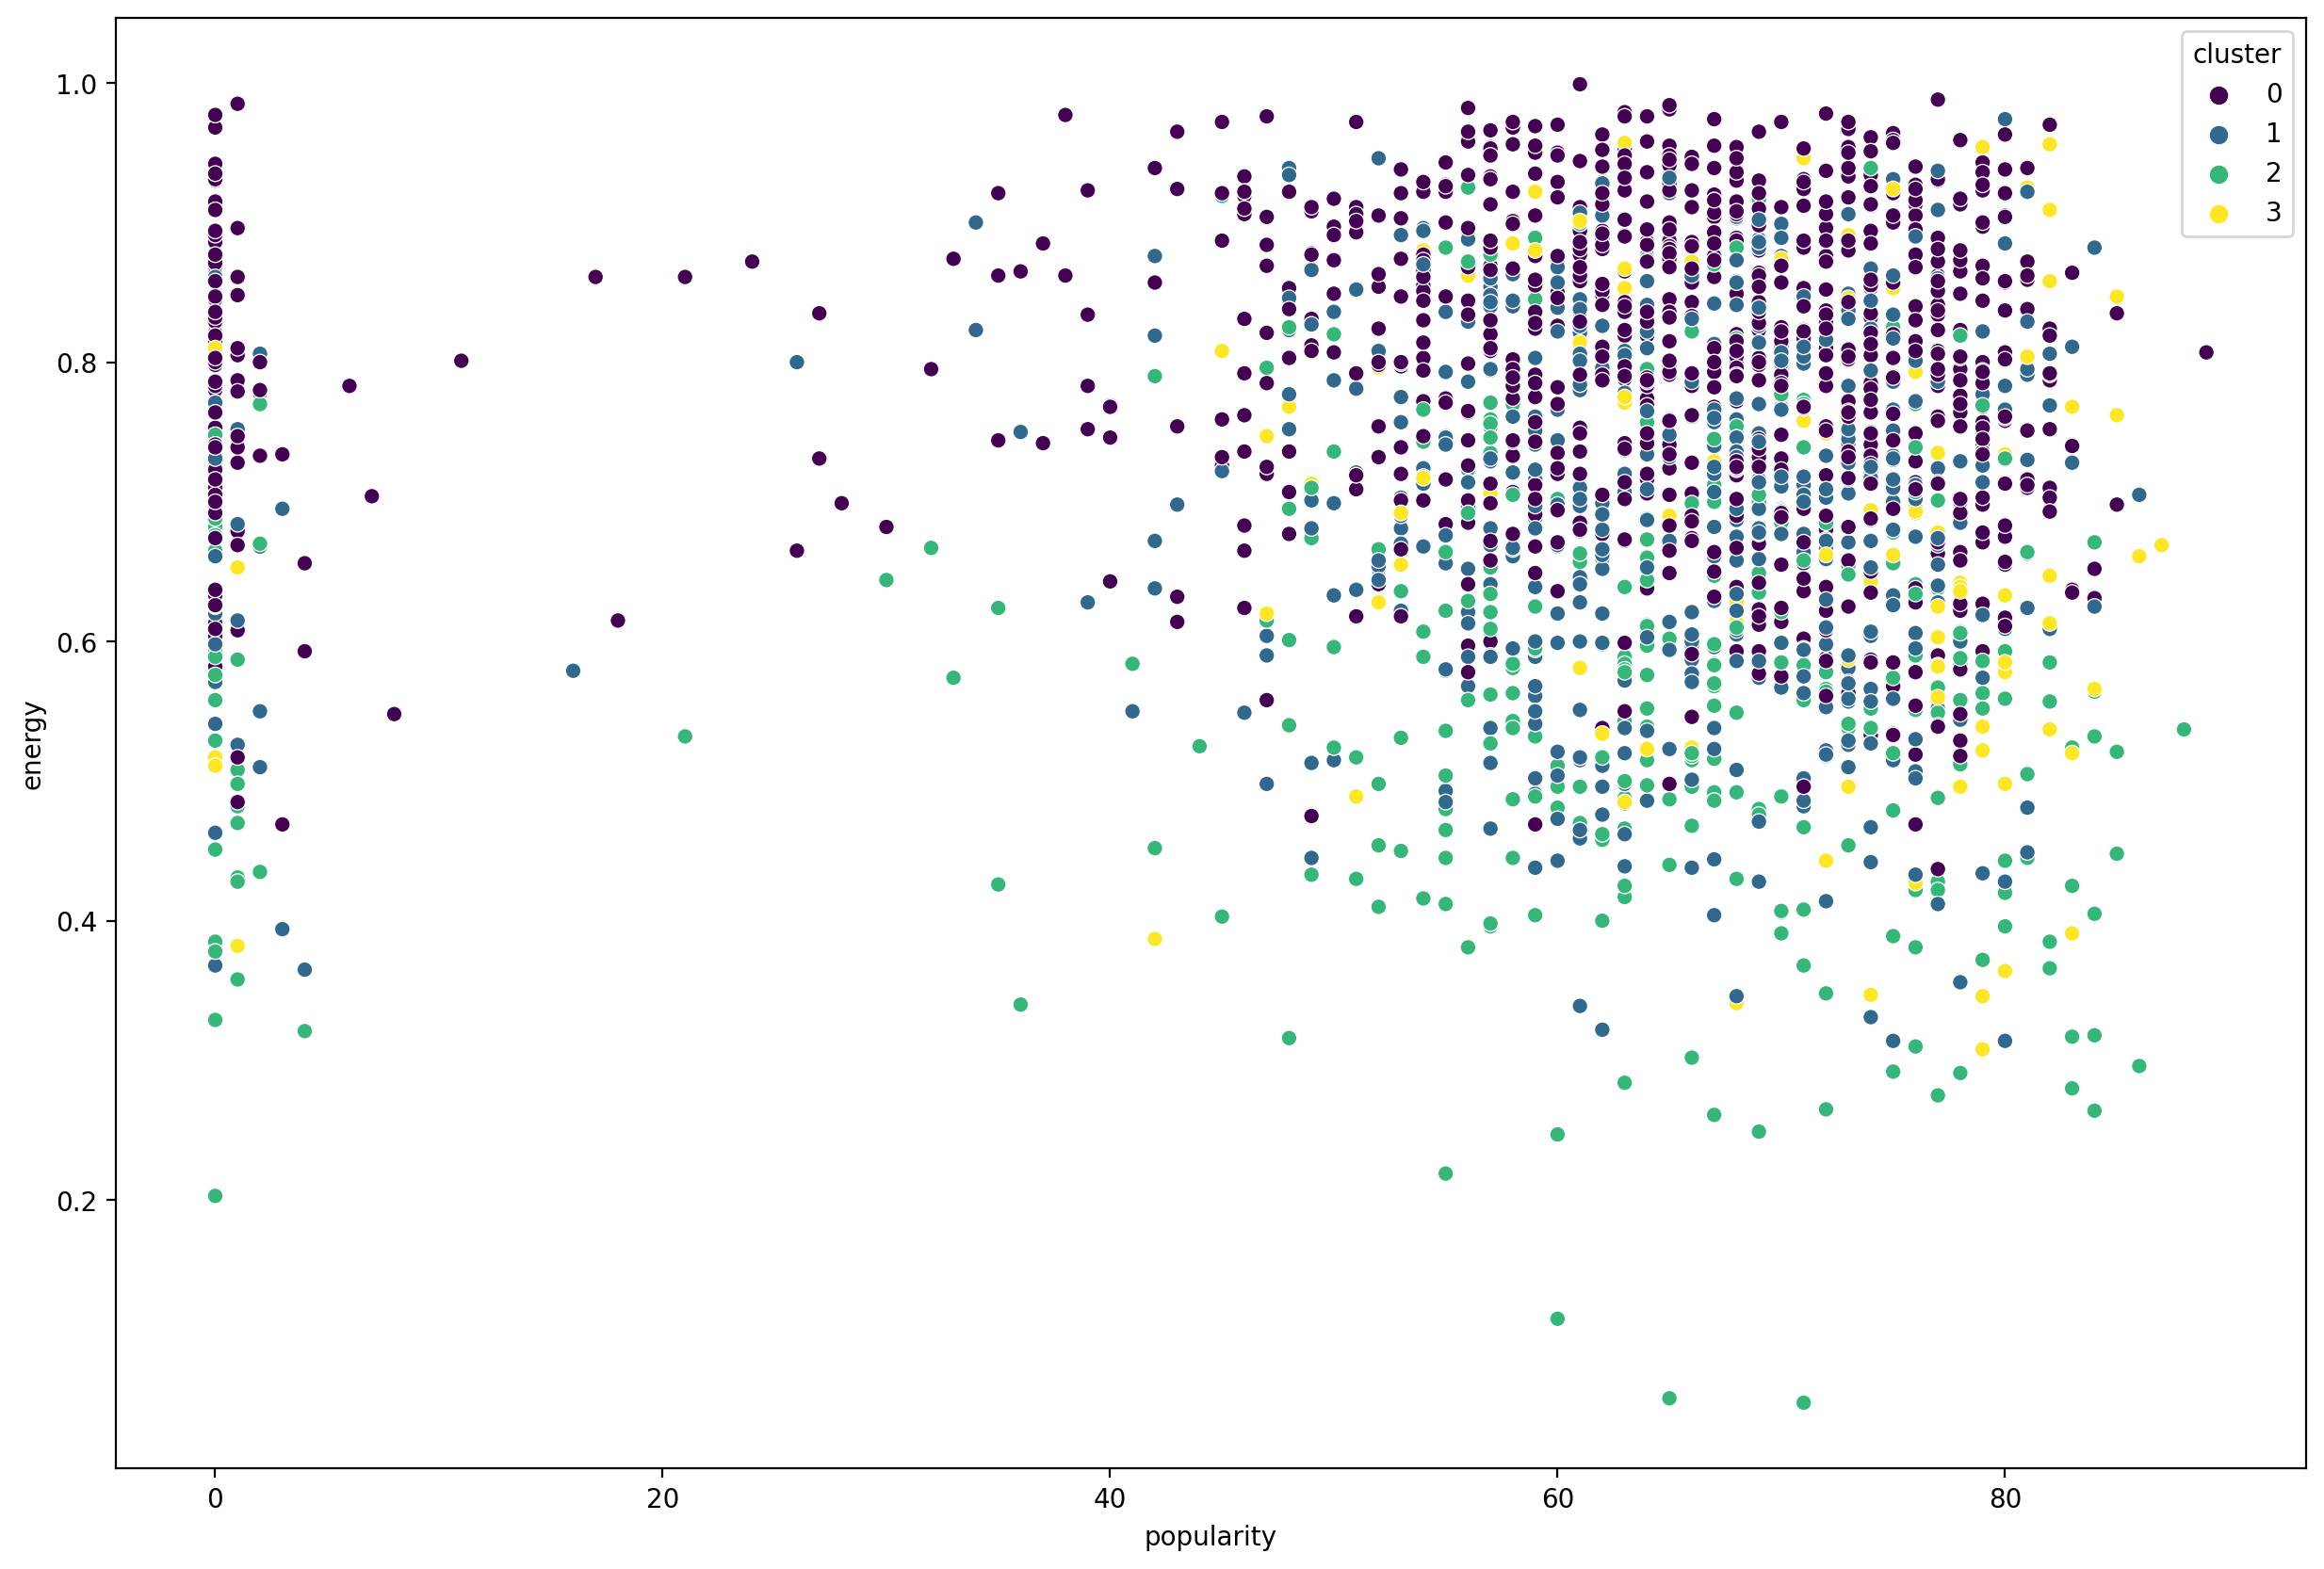

In [140]:
plt.figure(figsize=(15, 10), dpi=200)
sns.scatterplot(df, x='popularity', y='energy', hue='cluster', palette='viridis')

<Axes: xlabel='genre', ylabel='count'>

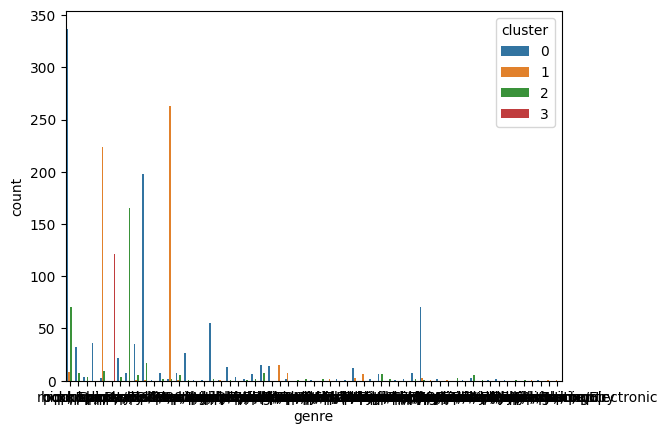

In [141]:
sns.countplot(df, x='genre', hue='cluster')

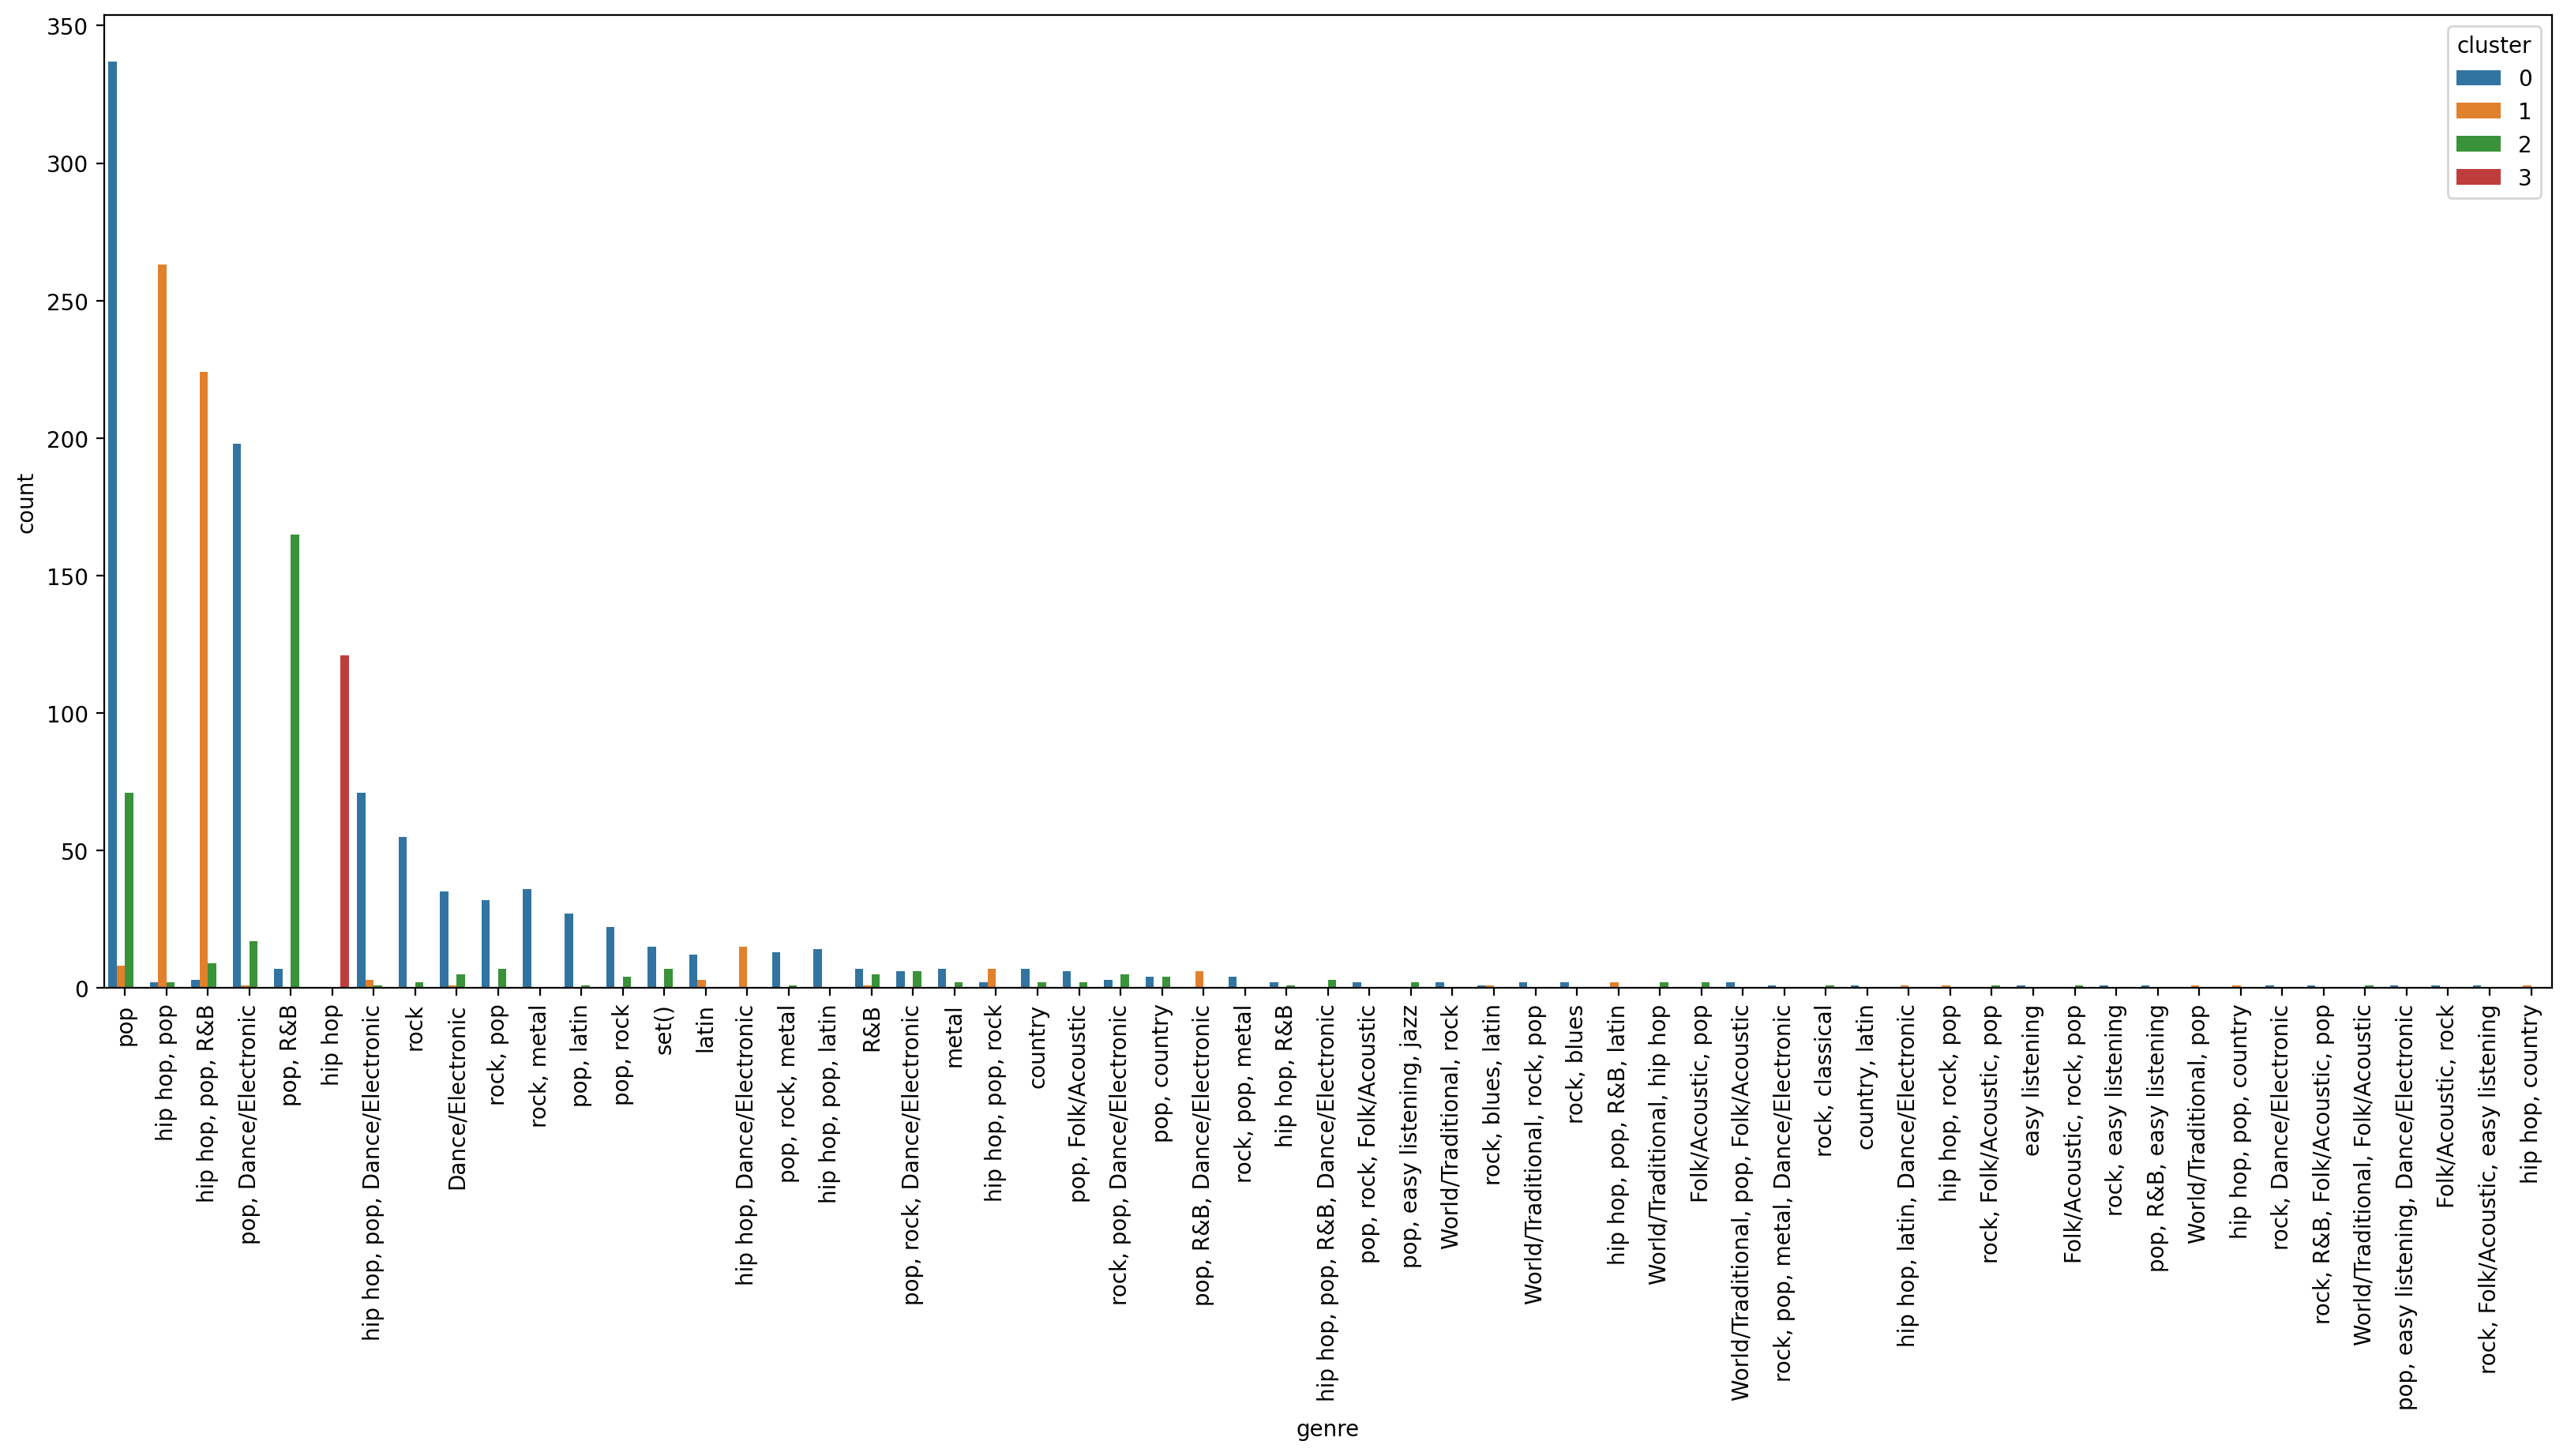

In [142]:
plt.figure(dpi=200, figsize=(20, 8))
sns.countplot(df, x='genre', order=df['genre'].value_counts().index, hue='cluster')
plt.xticks(rotation=90);

<Axes: xlabel='energy', ylabel='Density'>

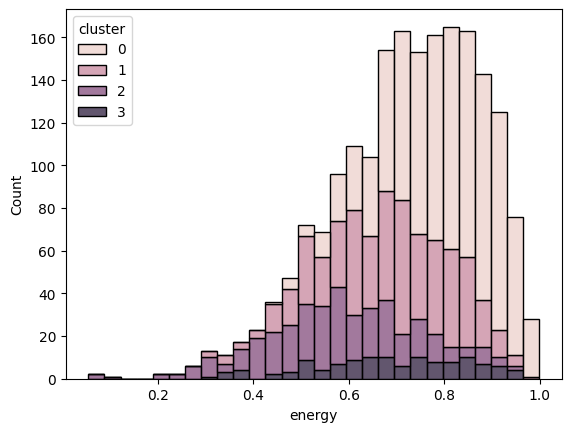

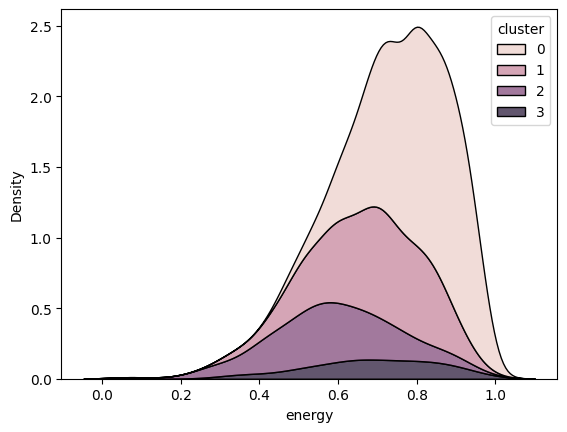

In [143]:
sns.histplot(df, x='energy', hue='cluster', multiple='stack')
plt.figure()
sns.kdeplot(df, x='energy', hue='cluster', multiple='stack')

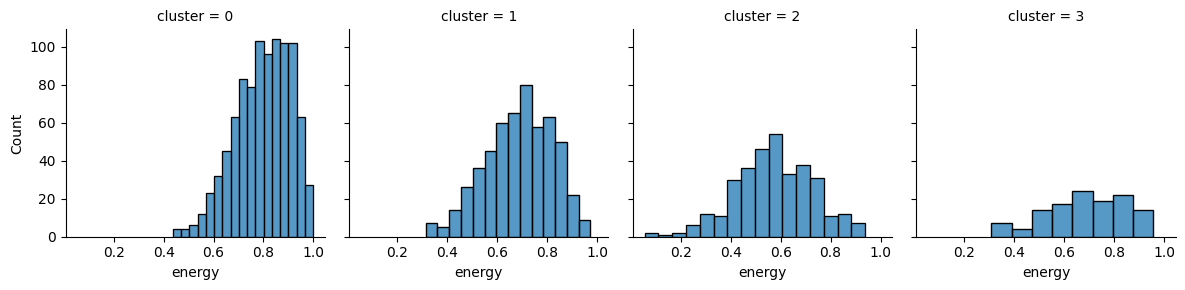

In [144]:
g = sns.FacetGrid(df, col="cluster", sharex=True, sharey=True)
g.map(sns.histplot, "energy")

In [145]:
df.corr()

/tmp/ipykernel_9179/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
duration_ms,1.000000,0.119608,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762,0.170561
explicit,0.119608,1.000000,0.077361,0.047308,0.243799,-0.164212,0.001795,-0.091265,0.050653,0.415445,-0.028032,-0.082605,0.008238,-0.045397,0.014650,0.337335
year,-0.318835,0.077361,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798,-0.059502
popularity,0.048140,0.047308,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057,0.059065
danceability,-0.060083,0.243799,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074,0.105107
energy,-0.082982,-0.164212,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305,-0.463200
key,-0.001353,0.001795,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852,-0.030359
loudness,-0.086226,-0.091265,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655,-0.334794
mode,-0.004095,0.050653,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445,0.042115
speechiness,0.062538,0.415445,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192,0.278215


/tmp/ipykernel_9179/331188534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

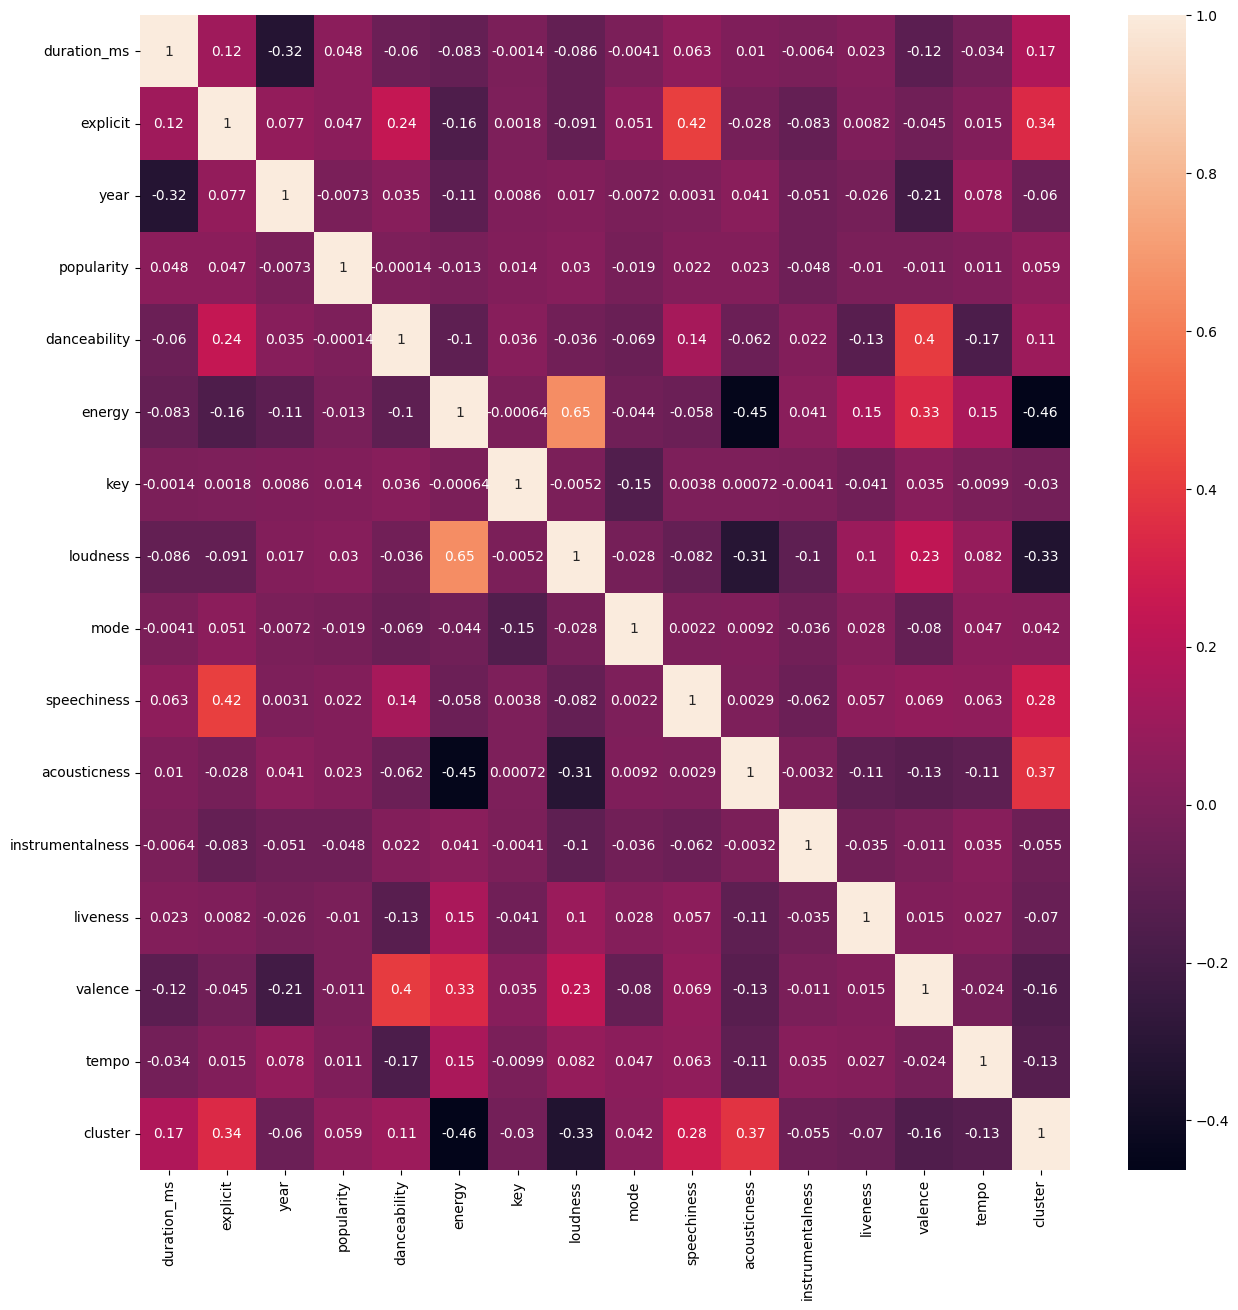

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

Cluster Labels and correlation

In [147]:
df.corr()["cluster"][:-1].loc[df.corr()["cluster"] < -0.25]

/tmp/ipykernel_9179/1177574107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["cluster"][:-1].loc[df.corr()["cluster"] < -0.25]


energy     -0.463200
loudness   -0.334794
Name: cluster, dtype: float64

In [148]:
df.corr()["cluster"][:-1].loc[df.corr()["cluster"] > 0.15]

/tmp/ipykernel_9179/1984142647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["cluster"][:-1].loc[df.corr()["cluster"] > 0.15]


duration_ms     0.170561
explicit        0.337335
speechiness     0.278215
acousticness    0.374170
Name: cluster, dtype: float64

/tmp/ipykernel_9179/816565548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["cluster"].iloc[:-1].sort_values().plot(kind='bar')


<Axes: >

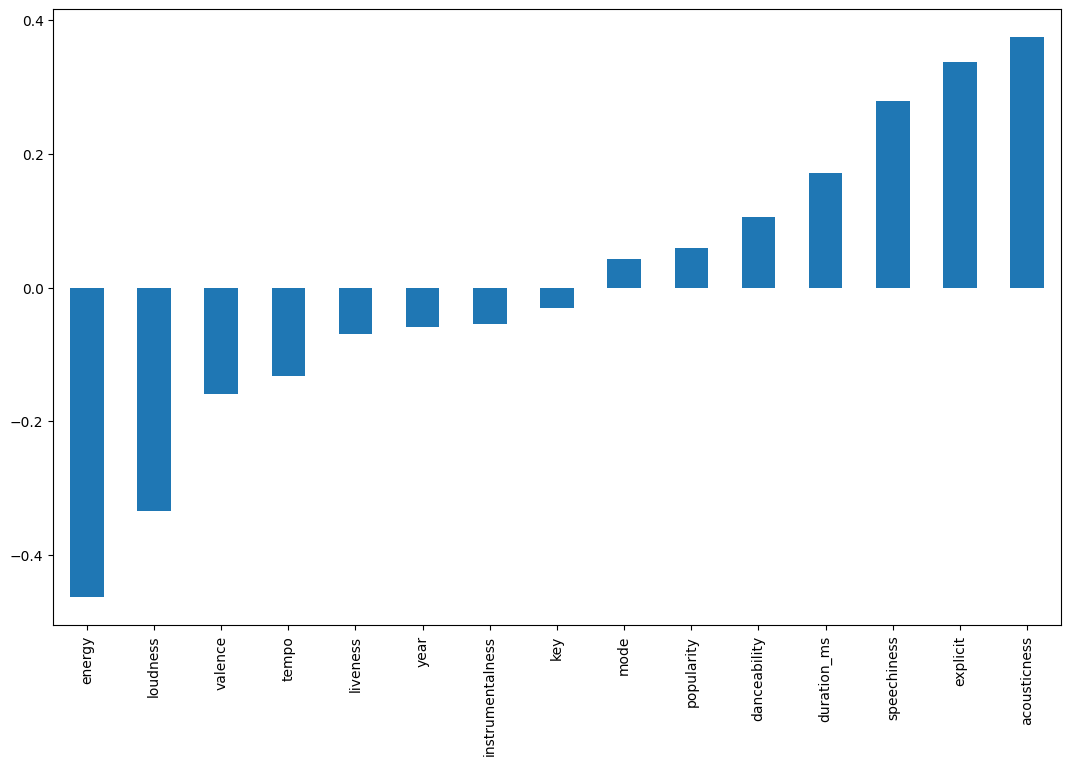

In [149]:
plt.figure(figsize=(13, 8))
df.corr()["cluster"].iloc[:-1].sort_values().plot(kind='bar')
# X.corr()["cluster"].iloc[:-1].sort_values().plot(kind='bar')

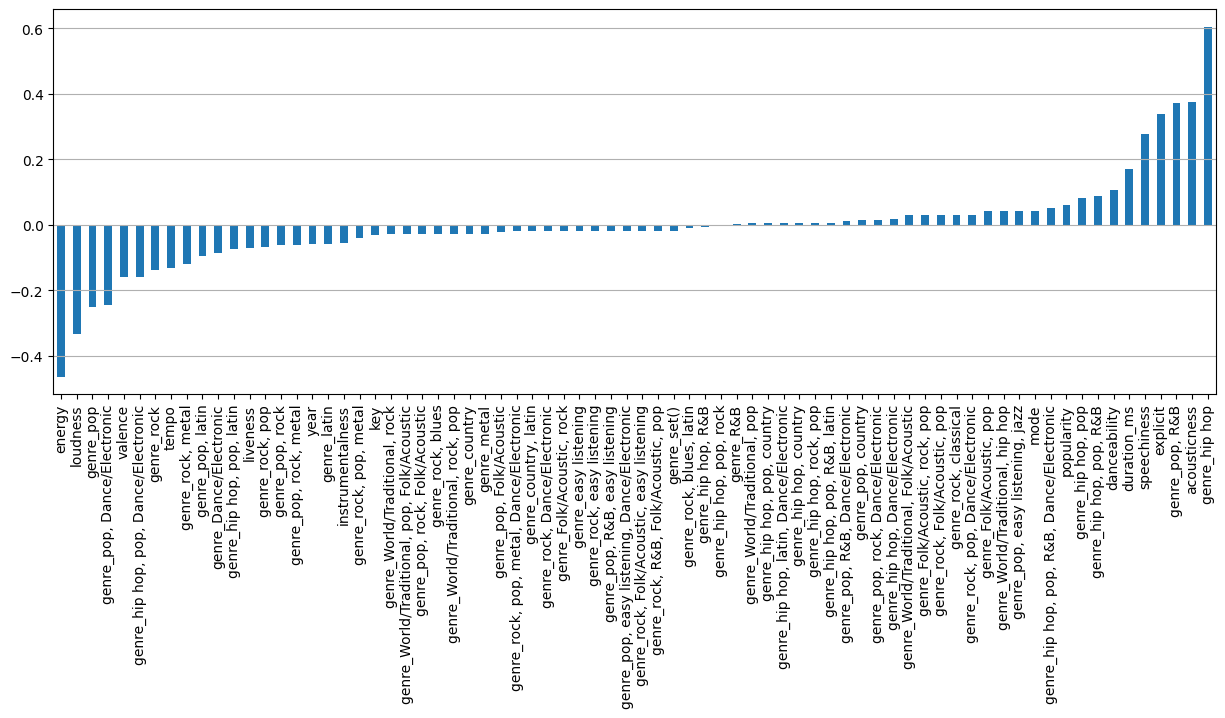

In [150]:
plt.figure(figsize=(15, 5))
X.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.grid(axis='y')

In [152]:
ssd = []
for k in range(2, 8):
    pass
    # generate model
    # model.inertia_